# 决策树

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split,cross_val_score
import graphviz

In [9]:
# 数据基础信息
wine = load_wine()
print(wine.data.shape)
print(wine.data)
print(wine.target)
print(wine.target_names)
print(wine.feature_names)

(178, 13)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_dilut

### 决策分类树
+ 1.sklearn的DecisionTreeClassifier使用的是CART树
    特点：处理连续值，二叉树，特征重复使用
+ 2.每次生成的树都不一样，有一个随机性，这是未来防止过拟合
参数：splitter="random"|"best"
       best: 应该是从最优的几个特征中按权重随机选取1个
       random: 从所有特征中随机选择1个

In [57]:
#随机拆分训练集、测试集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data, wine.target, test_size=0.3) 

准确率：0.9444444444444444
特征重要程度：
[0.09662065 0.01671364 0.         0.         0.         0.
 0.42697476 0.         0.03415991 0.13316    0.         0.
 0.29237104]


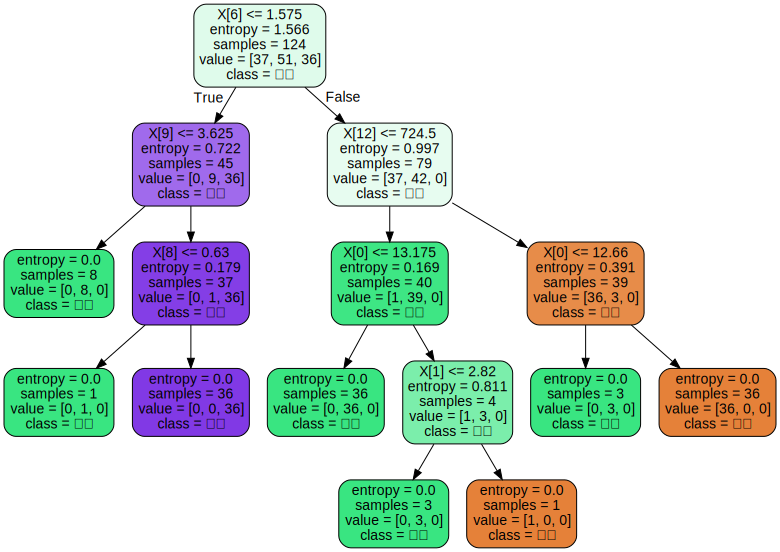

In [80]:
# 训练一个分类树

clf = DecisionTreeClassifier(criterion='entropy',splitter="best",random_state=2, max_depth=5) #splitter默认best
clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
print(f"准确率：{score}")
print("特征重要程度：") #这个是训练结束后clf统计出的一个重要性，越先用来分支的特征比重越大
print(clf.feature_importances_)
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                class_names=["琴酒","雪莉","啤酒"],
                                filled=True, rounded=True) 
# print(dot_data) #digraph Tree 对象，存储了树信息
graph = graphviz.Source(dot_data) 
graph #输出图

#### 确认最优的剪枝参数
调参：
+ max_depth 
+ min_samples_leaf 叶子样本低于这个值，取消该叶子及上面的分支
+ min_samples_split 样本低于该值，不分支
+ min_impurity_decrease 不纯度限制，不纯度下降低于这个值就不分支
+ max_features 限制分枝时考虑的特征个数，超过的特征被丢弃 （若想降维，建议采用一些降维方式，不是设置该参数）

最优准确率：0.9814814814814815，此时max_depth：3


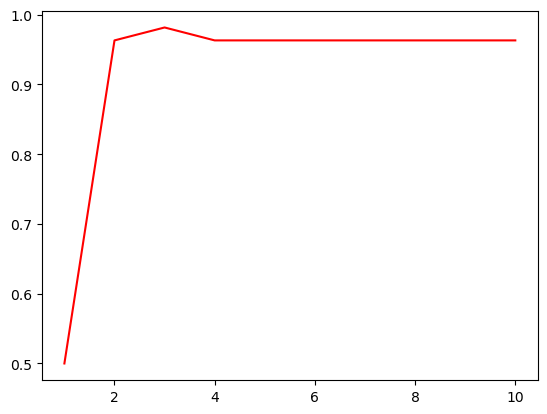

In [73]:
#画学习曲线
scores=[]
for i in range(1,11):
    clf = DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=3)
    clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest, Ytest)
    scores.append(score)
plt.plot(range(1,11),scores, 'red')
max_idx = np.argmax(scores)
print(f"最优准确率：{scores[max_idx]}，此时max_depth：{max_idx+1}")

In [103]:
#样本不平衡时，预测结果倾向于数量多的样本的分类
x_data = wine.data[55:]
y_data = wine.target[55:]
x_train, x_test,y_train,y_test = train_test_split(x_data, y_data,test_size=0.3)

0.8876404494382022


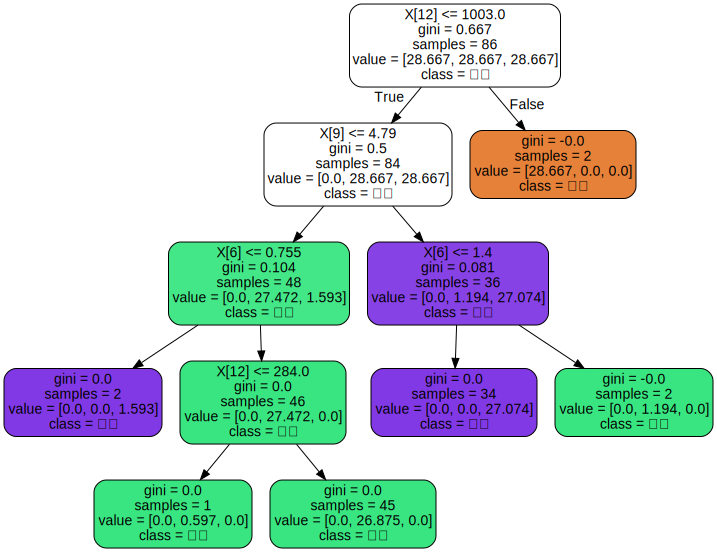

In [111]:
# 对于不平衡的样本，加上class_weight="balanced",给数量少的样本类别更高的权重，从而最终提高正确率
# 自动分配权重：weights = n_samples / (n_classes * np.bincount(y))
clf = DecisionTreeClassifier(criterion='gini',random_state=10, class_weight="balanced") 
clf.fit(x_train, y_train)
score = clf.score(wine.data, wine.target)
print(score)
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                class_names=["琴酒","雪莉","啤酒"],
                                filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph 

### 决策回归树
拟合正弦曲线
结论：单棵回归树拟合对噪音敏感，容易过拟合或者欠拟合

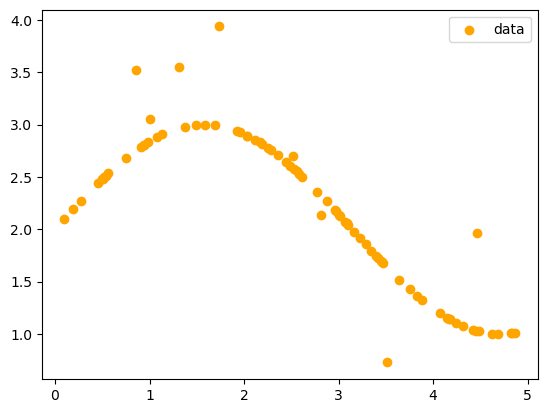

In [156]:
rng = np.random.default_rng(2)
x_train = 5*rng.random((80,1))
x_axis = x_train.ravel()
y_label = np.sin(x_axis)+2
y_label[::10] += 2*(rng.random(8) - 0.5)

plt.scatter(x_axis, y_label, c='orange', label='data')
plt.legend()

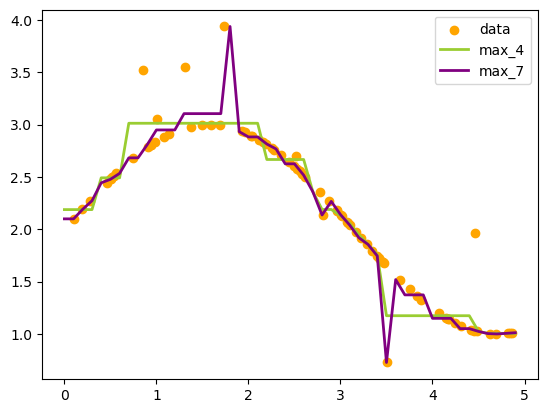

In [184]:
x_test = np.arange(0,5,0.1)
x_test = x_test.reshape(50,1)

reg = DecisionTreeRegressor(max_depth=4)
reg.fit(x_train,y_label)

reg_2 = DecisionTreeRegressor(max_depth=7)
reg_2.fit(x_train,y_label)


y_test = reg.predict(x_test)
y_test_2 = reg_2.predict(x_test)
plt.scatter(x_axis, y_label, c='orange', label='data')
plt.plot(x_test,y_test,c='yellowgreen', label='max_4', linewidth=2)
plt.plot(x_test,y_test_2,c='purple', label='max_7', linewidth=2)
plt.legend()
